In [1]:
%load_ext autoreload
%autoreload 2
import pyro.distributions as dist
import torch

import matplotlib.pyplot as plt
from dotenv import dotenv_values
from scipy import stats
from torch import Tensor

from bayesian_stats.distributions import KDEDistribution

# Latent distribution

In [39]:
latent_dist = dist.Beta(3,2)

torch.manual_seed(1234)
num_samples = 2**12
batch_size = ()
samples = latent_dist.sample((num_samples, *batch_size))
samples.shape

torch.Size([4096])

# Kernel Density Estimated Distribution

In [45]:
kde_dist = KDEDistribution(
    samples=samples,
    bounds=(0., 1.),
)

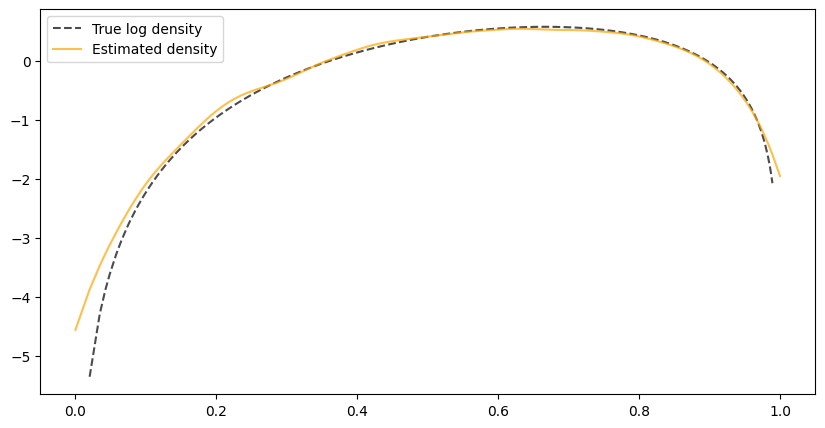

In [41]:
_, ax = plt.subplots(figsize=(10,5))
ax.plot(
    kde_dist._samples, 
    latent_dist.log_prob(kde_dist._samples), 
    color="black", 
    alpha=0.7,
    linestyle="--", 
    label="True log density"
)
ax.plot(
    kde_dist._samples, 
    kde_dist._density, 
    color="orange", 
    alpha=0.7, 
    label="Estimated density",
)
ax.legend();

In [49]:
kde_dist.sample((10,2))

tensor([[0.5423, 0.3417],
        [0.4305, 0.4013],
        [0.7356, 0.5551],
        [0.7068, 0.3816],
        [0.6646, 0.7283],
        [0.8982, 0.4054],
        [0.4962, 0.2372],
        [0.7046, 0.7886],
        [0.5523, 0.7731],
        [0.3423, 0.5387]])